## Airfare prediction - dometic Indian flight prices in 2019

#### In this notebook we carry out predicting flight prices using Random Forest Regressor.
###### This work is part of the Udemy course "Data Science Real World Projects in Python". All the datasets used for the projects are from the course.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r"Cleaned_Train.csv")

In [3]:
#Remove unnecessary features

train_data.drop(columns=['Route', 'Additional_Info','Duration_in_mins'],axis=1,inplace=True)

In [4]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minutes',
       'Arrival_Time_hour', 'Arrival_Time_minutes'],
      dtype='object')

In [5]:
train_data.dtypes

Airline                 object
Source                  object
Destination             object
Total_Stops              int64
Price                    int64
Journey_Day              int64
Journey_Month            int64
Dep_Time_hour            int64
Dep_Time_minutes         int64
Arrival_Time_hour        int64
Arrival_Time_minutes     int64
dtype: object

### Data encoding

For encoding categorical data we can use two methods.
    1. One hot encoding (OHE)
    2. Taget encoding (TE)
    
If OHE adds a very high number of additional columns (this is based on number of unique values per each categorical attribute) then TE is preffered. However, TE could cause target variable leaking. Hence, causing over-fitting.

In this case we use both methods to see which performs better.

In [6]:
#Calculate number of additional columns required under OHE.
for idx, col in enumerate(train_data.columns):
    if train_data.iloc[:,idx].dtypes == "object":
        print(col, " -> " ,len(train_data.iloc[:,idx].unique()))

Airline  ->  12
Source  ->  5
Destination  ->  5


#### One hot encoding

In [7]:
#Applying OHE

#ordinal encoder
from sklearn.preprocessing import OneHotEncoder

categorical_var = [ col for col in train_data.columns if train_data[col].dtypes=="object" ]

ohe_df = pd.get_dummies(train_data, categorical_var)

ohe_df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Airline_Air Asia,Airline_Air India,...,Source_Banglore,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,13882,6,9,9,25,4,25,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,6218,5,12,18,5,23,30,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,13302,3,1,16,50,21,35,0,0,...,1,0,0,0,0,0,0,0,0,1


#### Target encoding

In [8]:
te_df = train_data.copy(deep=True)

In [9]:
# Applying TE for Airport
airlines = te_df.groupby(['Airline'])['Price'].mean().sort_values().index

#convert to dictionary 
dict_airline = {key:idx for idx, key in enumerate (airlines)}

#map dict to airline feature
te_df['Airline'] = te_df['Airline'].map(dict_airline)


In [10]:
# Applying TE for Destination

destinations = te_df.groupby(['Destination'])['Price'].mean().sort_values().index

destination_dict = { key:idx for idx, key in enumerate(destinations)}

te_df['Destination'] = te_df['Destination'].map(destination_dict)


In [11]:
# Applying TE for Source

sources = te_df.groupby(['Source'])['Price'].mean().sort_values().index

source_dict = { key:idx for idx, key in enumerate(sources)}

te_df['Source'] = te_df['Source'].map(source_dict)


#### Outlier detection

1. Distplot
2. Histogram
3. Boxplot

In [12]:
def plot(df):
    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
    sns.distplot(df['Price'],ax=axes[0])
    sns.histplot(df['Price'],ax=axes[1])
    sns.boxplot(df['Price'],ax=axes[2])


/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


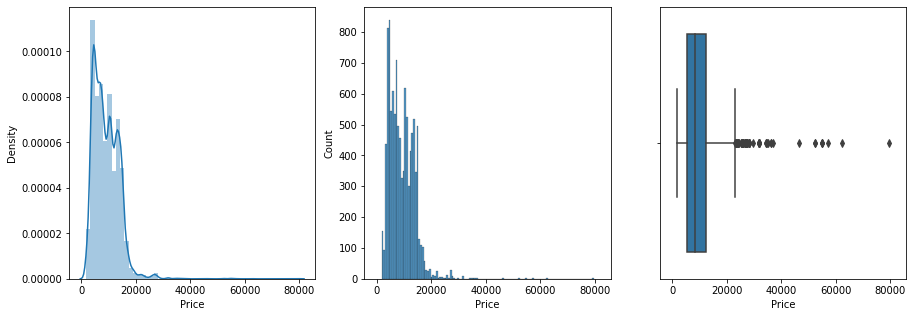

In [13]:
plot(ohe_df)

In [14]:
# replace all prices with median price if they are > 35k
ohe_df['Price'] = np.where (ohe_df['Price'] >= 35000 , ohe_df['Price'].median(), ohe_df['Price'])
te_df['Price'] = np.where (te_df['Price'] >= 35000 , te_df['Price'].median(), te_df['Price'])

/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


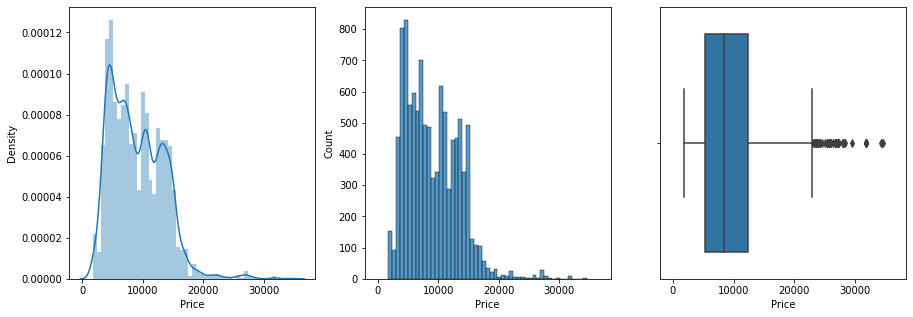

In [15]:
plot(ohe_df)

/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


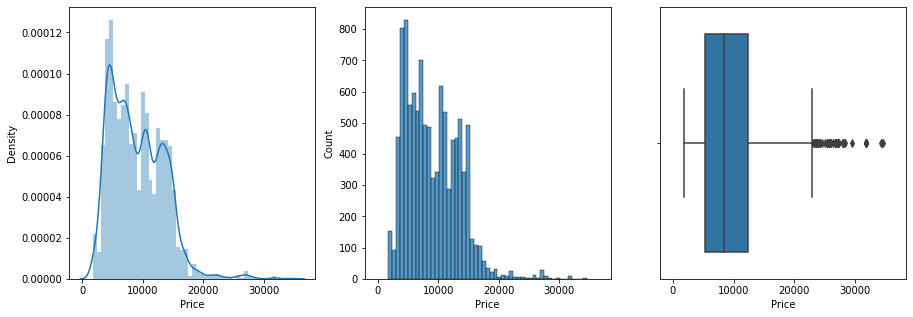

In [16]:
plot(te_df)

#### Feature selection

In [17]:
X = ohe_df.loc[:, ohe_df.columns != 'Price']

In [18]:
y = ohe_df.loc[:, ohe_df.columns == 'Price']

/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

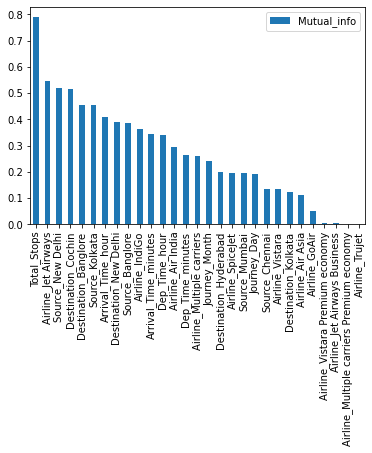

In [19]:
from sklearn.feature_selection import mutual_info_regression
pd.DataFrame(mutual_info_regression(X,y),index=X.columns,columns=['Mutual_info']).sort_values(by='Mutual_info', ascending=False).plot(kind='bar')


### ML model training

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

#on ohe data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model_ohe = RandomForestRegressor()
model_ohe = rf_model_ohe.fit(X_train, y_train)
y_pred_ohe = model_ohe.predict(X_test)

#Save model #wb- erite binary
pickle_out = open("models/rf_ohe.pkl", "wb")
pickle.dump(rf_model_ohe, pickle_out)
pickle_out.close()

/var/folders/4b/r_p92ss978z32lh_qlxs17lr0000gn/T/ipykernel_63850/3520602922.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_ohe = rf_model_ohe.fit(X_train, y_train)


In [21]:
#on te data

X = te_df.loc[:, te_df.columns != 'Price']
y = te_df.loc[:, te_df.columns == 'Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model_te = RandomForestRegressor()
model_te = rf_model_te.fit(X_train,y_train)
y_pred_te = model_te.predict(X_test)

#Save model
pickle_out = open("models/rf_te.pkl", "wb")
pickle.dump(rf_model_te, pickle_out)
pickle_out.close()

/var/folders/4b/r_p92ss978z32lh_qlxs17lr0000gn/T/ipykernel_63850/4102389431.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_te = rf_model_te.fit(X_train,y_train)


In [22]:
#### load model
model = open("models/rf_te.pkl", "rb")
rf_model = pickle.load(model)
rf_model.predict(X_test)


array([16679.19,  6284.63,  9025.35, ...,  3445.2 ,  6357.11,  6805.25])

#### Model evaluation

Mean Absolute Percentage Error (MAPE)

In [23]:
def compute_mape(y_true, y_pred):
    y_true = np.array(y_true).reshape(1,-1)
    y_pred = np.array(y_pred).reshape(1,-1)

    abs_error = np.abs(np.array(y_true) - np.array(y_pred))
    perc_error = (abs_error/np.array(y_true))*100
    mean_mape = np.mean(perc_error)
    median_mape = np.median(perc_error)

    return mean_mape

In [24]:
from sklearn import metrics

def predict(model, X_train, X_test, y_train, y_test):

    #y_test = np.array(y_test).reshape(1,-1)

    model_ohe = model.fit(X_train, y_train)
    print('Training Error : {}'.format(model.score( X_train, y_train)))

    y_pred = model.predict(X_test)
    #y_pred = np.array(y_pred).reshape(1,-1)
    
    r2 = metrics.r2_score(y_test, y_pred)
    print('r2-score : {}'.format(r2))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_pred)))
    print('MAPE : {}'.format(compute_mape(y_test,y_pred )))
    print('Accuracy : {}'.format(100-compute_mape(y_test,y_pred )))

    sns.distplot(np.array(y_test).reshape(1,-1)-np.array(y_pred).reshape(1,-1))



/var/folders/4b/r_p92ss978z32lh_qlxs17lr0000gn/T/ipykernel_63850/2848894668.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_ohe = model.fit(X_train, y_train)


Training Error : 0.9514355570901012
r2-score : 0.8182573315916918
MSE : 3538093.510699962
MAPE : 13.061932874236781
Accuracy : 86.93806712576321


/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


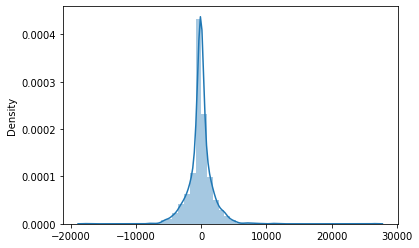

In [25]:
X = ohe_df.loc[:, ohe_df.columns != 'Price']
y = ohe_df.loc[:, ohe_df.columns == 'Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf_model = RandomForestRegressor()

predict(rf_model, X_train, X_test, y_train, y_test)


/var/folders/4b/r_p92ss978z32lh_qlxs17lr0000gn/T/ipykernel_63850/2848894668.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_ohe = model.fit(X_train, y_train)


Training Error : 0.9512320275623136
r2-score : 0.818265539930292
MSE : 3537933.714050174
MAPE : 13.07574993893693
Accuracy : 86.92425006106308


/Users/navodasenavirathne/learn_python/lesson01/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


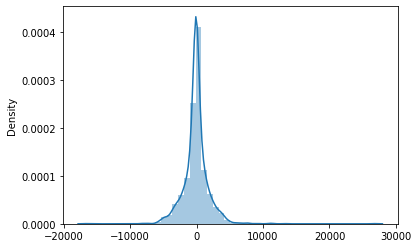

In [26]:
X = te_df.loc[:, te_df.columns != 'Price']
y = te_df.loc[:, te_df.columns == 'Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf_model = RandomForestRegressor()

predict(rf_model, X_train, X_test, y_train, y_test)


We can observe that the model trained on one-hot-encoded data has slightly better accuracy compared to target encoded data.

#### Hyperparameter tunning

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestRegressor()


In [35]:
n_estimators = [int(x) for x in np.linspace(start=1000,stop=1200,num=2)]
m_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=10, stop=20, num=2)]
min_samples_split = [5, 10]

In [36]:
random_grid = {
 'n_estimatorsint' : n_estimators,
 'max_features' : m_features,
 'max_depth' : max_depth,
 'min_samples_split' : min_samples_split
}

In [39]:
rf_Random = RandomizedSearchCV(rf_model, random_grid, cv=2, n_jobs=-1)

In [2]:
rf_Random.fit(X_train, y_train)

In [ ]:
rf_Random.best_params_